In [3]:
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt

%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#from arr_2016_ifd_rain import * 
from arr_2016_hub_rain import *
   
debug = 0

IFD_DIR = '../anuga_northern_rivers/CCC_ARR_HUB/East_Coast_South' 
Frq = 1000
Dur = 540
Catchment_Area = 100 # In SqKm


SiteLabel = 'Test Site Tuggerah Lakes'
Lat = -33.21990875
Lon = 151.34782281

#Lat = -33.6
#Lon = 151.6

#---------------- East Coast South -------------------------------------
Hub_Dir = '../anuga_northern_rivers/CCC_ARR_HUB/East_Coast_South' 
hub_filename = os.path.join(Hub_Dir,'CCC_ARRHUB_ECSouth_Download.txt')
#------ Pattern Type Point or Areal if Catchment > 75km2 Areal
Patterns_list = ['Point','Areal']
patterns = 'Areal'

hub_file = Arr_hub_rain(hub_filename)


print(hub_file.Loc_Lat,hub_file.Loc_Lon,hub_file.Divis,hub_file.RivNum,hub_file.RivName)
print(hub_file.TimeAccessed,hub_file.Version)
print(hub_file.Tpat_code,hub_file.Tpatlabel)
print(hub_file.ATpat_code,hub_file.ATpatlabel)


if patterns == 'Point':
    Tpat_code = hub_file.Tpat_code
    PatternType = 'Point Rain'
elif patterns == 'Areal':
    Tpat_code = hub_file.ATpat_code
    PatternType = 'Areal'

# Read the Point or Areal Rainfall Patterns
pattern_zip_file = os.path.join(Hub_Dir, Tpat_code+'.zip')
prp = ARR_point_rainfall_patterns(pattern_zip_file, Tpat_code, debug)

# SELECT 1 or more of the 720 patterns 
# Create TABLES ????
print(prp.STATS_Labels)
for l in [1,2,719,720]:
    bitsAS = prp.linesAStat[l]
    print(bitsAS)
print(prp.INCS_Labels)
for l in [1,2,719,720]:
    bitsInc = prp.linesInc[l]
    print(bitsInc)

-33.035717 151.265069 South East Coast (NSW) 10 Hunter River
17 September 2019 02:43PM 2016_v1
ECsouth East Coast South
ECsouth East Coast South
['Event ID', 'Region', 'Region (source)', 'Burst Duration (min)', 'Burst Loading', 'Original Burst Depth (mm)', 'AEP Window', 'AEP (source) (%)', 'Burst Start Date', 'Burst End Date', 'DB Event Reference No.', 'DB Pluviograph Reference No.', 'Offical Gauge', 'Lat', 'Long']
['4380', 'East Coast (South)', 'East Coast (South)', '10', '1', '15.5', 'frequent', '14.4679', '3/25/2009 17:45', '3/25/2009 17:50', '113650', '1828', 'qcd_563064_233', '-32.2375', '150.6306']
['4382', 'East Coast (South)', 'East Coast (South)', '10', '1', '18.8', 'frequent', '14.4924', '12/28/1999 17:05', '12/28/1999 17:10', '39777', '517', 'qcd_061250', '-32.6296', '151.5919']
['5071', 'East Coast (South)', 'East Coast (North)', '10080', '2', '400.84', 'rare', '2.9538', '1/7/1968 11:45', '1/14/1968 11:40', '27412', '358', 'qcd_040318', '-27.0258', '152.5642']
['5072', 'Eas

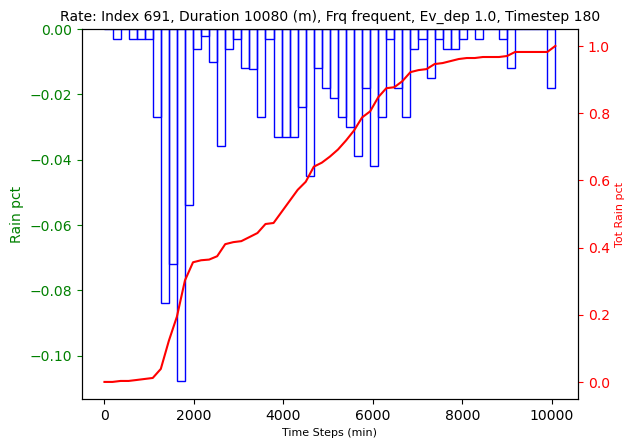

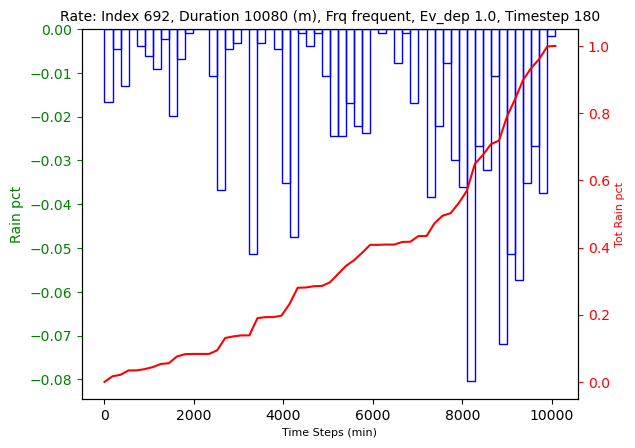

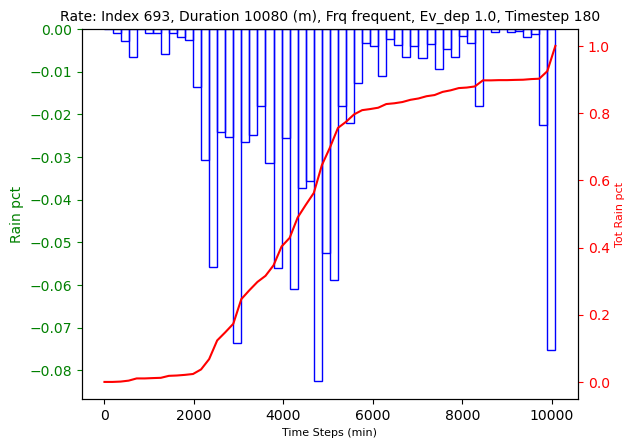

In [5]:
#for l in [1 + 30*j for j in range(24)]: # first example of each duration type
#for l in [691 + j for j in range(30)]:  # 30 versions for a particular duration  
for l in [691 + j for j in range(3)]:  # 3 versions for a particular duration 

    ptn = Single_pattern(prp, index=l)

    ptn.plot(title=f"Rate: Index {l}, Duration {ptn.Ev_dur} (m), Frq {ptn.Ev_Frq}, Ev_dep {ptn.Ev_dep}, Timestep {ptn.Tstep}")
    


Approximate Integral of rate_fun 119.99978334


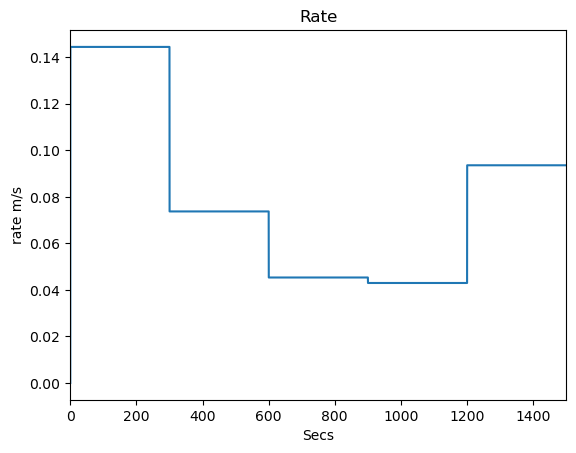

In [8]:
patternl = Single_pattern(prp, 92, Ev_dep=120)

#print(patternl.Tplot)
#print(patternl.Rplot)
Ev_dur = patternl.Ev_dur
Ev_dur_sec = Ev_dur*60 # in seconds
Tstep = patternl.Tstep
Tstep_sec = Tstep*60
Tstps = patternl.Tstps



Tplot = patternl.Tplot  # time in minutes
Rplot = patternl.Rplot  # fraction of event over each timestep

Tplot_sec = Tplot*60 # seconds
Rate_factor = Rplot/Tstep_sec # convert so that {Intensity of rain in mm} X {Rate_factor} is in units of m/s

from scipy.interpolate import interp1d

rate_fun = interp1d(Tplot_sec, Rate_factor, kind='next', fill_value=0.0, bounds_error=False)

n = 1000000
t = np.linspace(0.0,Ev_dur_sec,n)
r = rate_fun(t)

# brute force approximation of integral of 
# int_0^Ev_dur_sec  rate_fun(t) dt
rsum = r.sum()*Ev_dur_sec/n

print(f'Approximate Integral of rate_fun {rsum}')

plt.plot(t,r)
#plt.ylim(0.0, 1.2e-5)
plt.xlim(0.0, Ev_dur_sec)
plt.title('Rate')
plt.xlabel('Secs')
plt.ylabel('rate m/s');

E_Dur: 540, TStep: 30, TSteps: 18, Zone: East Coast (South)
Frequent


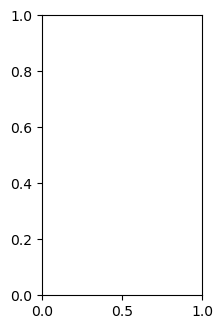

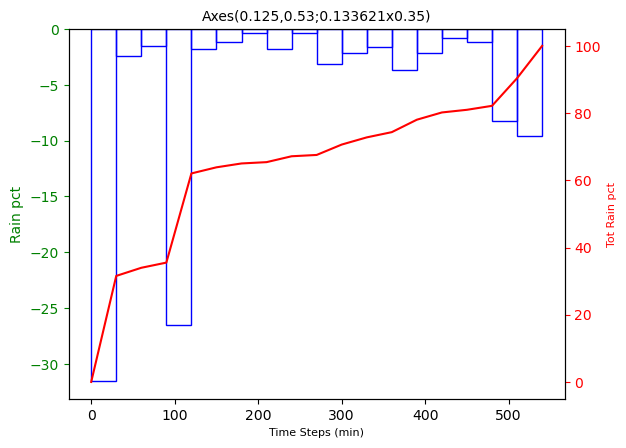

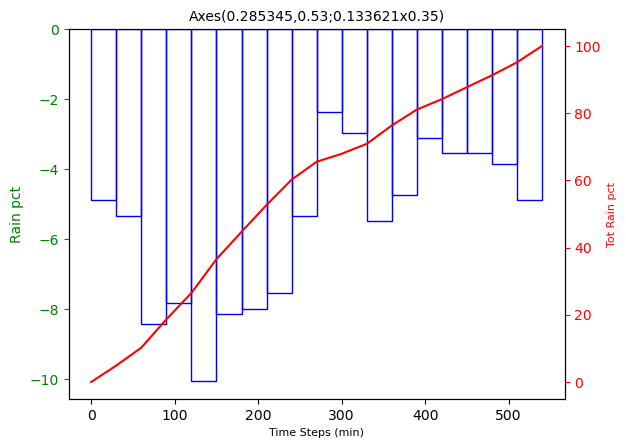

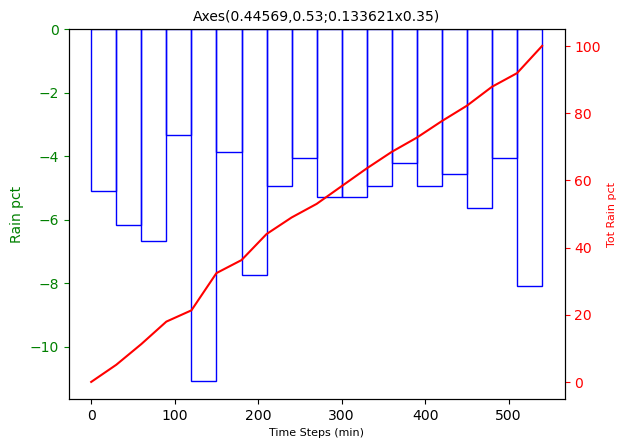

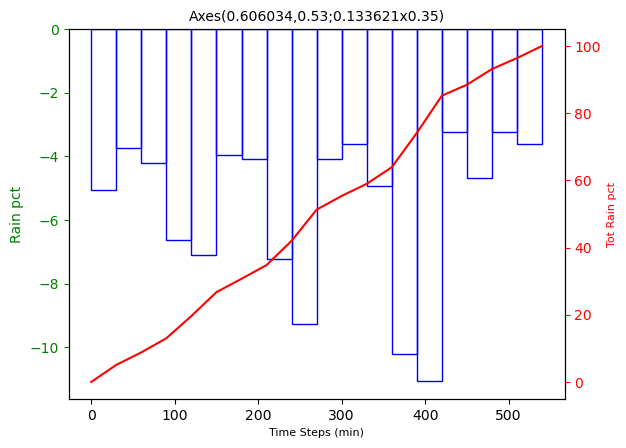

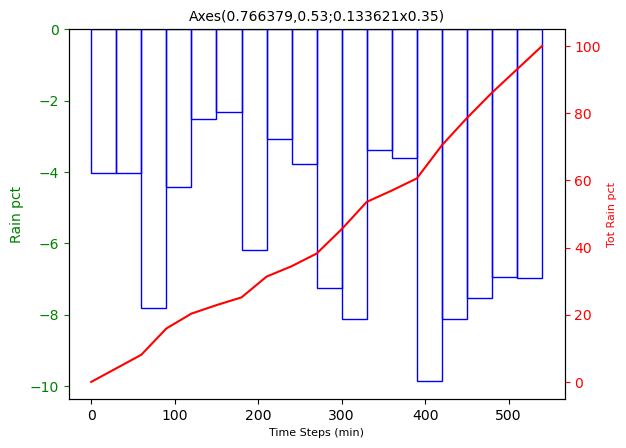

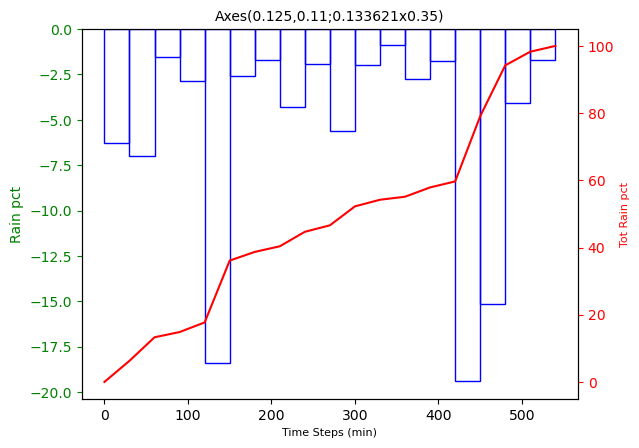

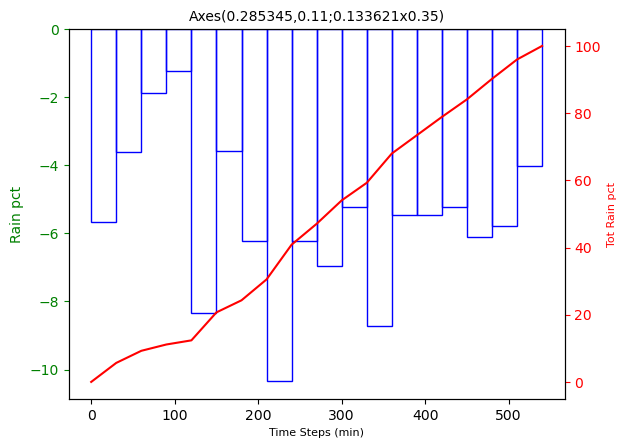

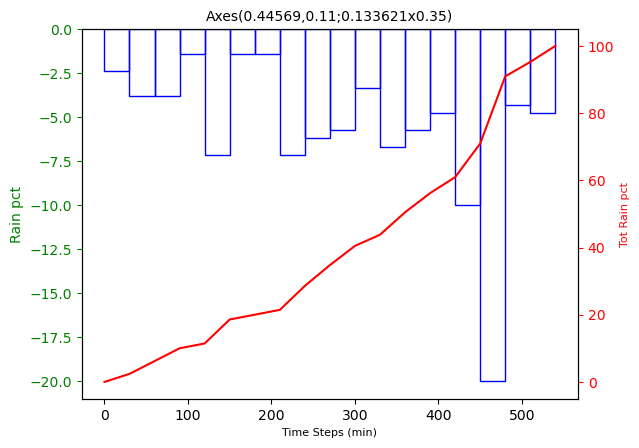

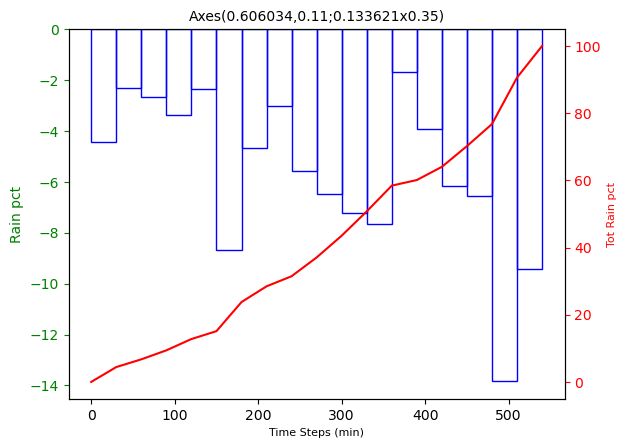

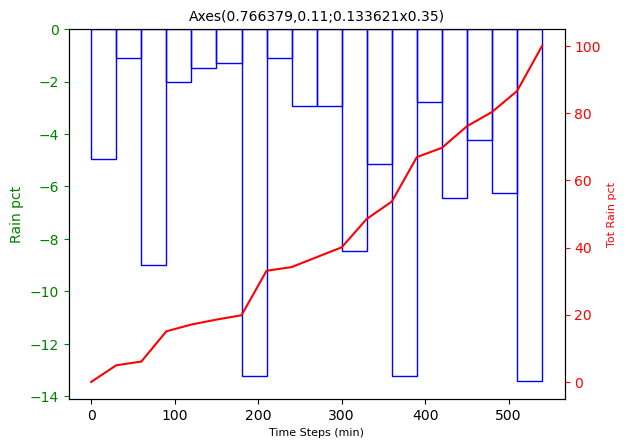

<Figure size 640x480 with 0 Axes>

Intermediate


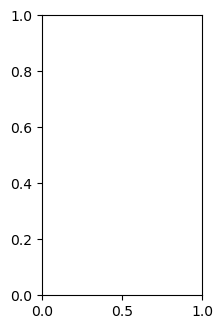

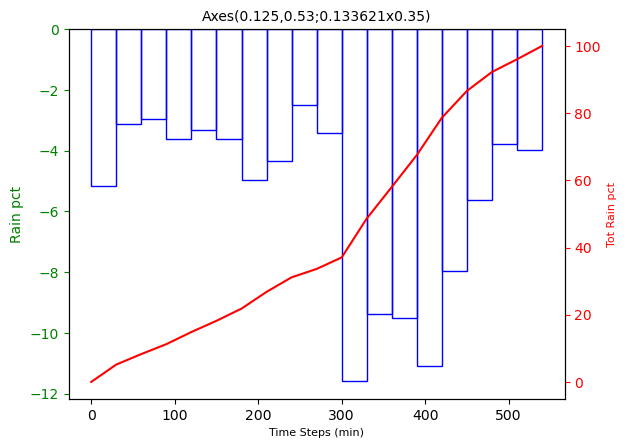

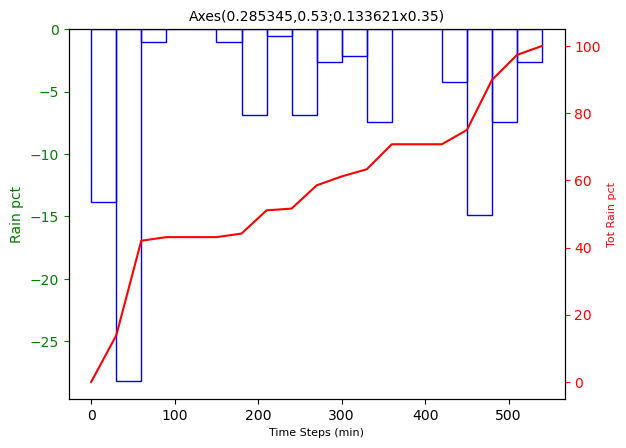

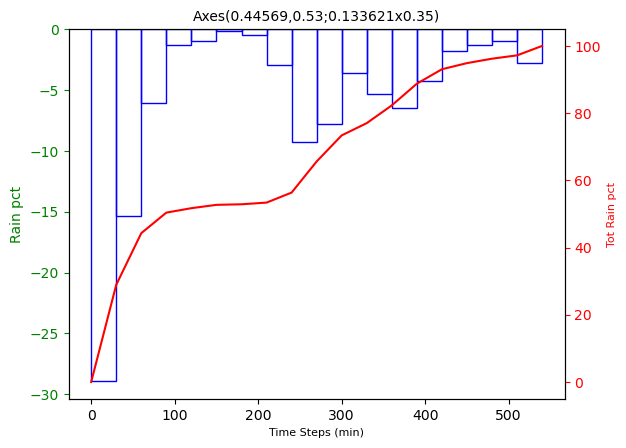

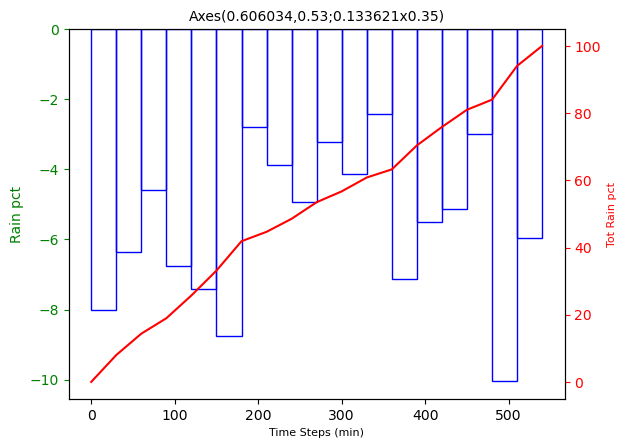

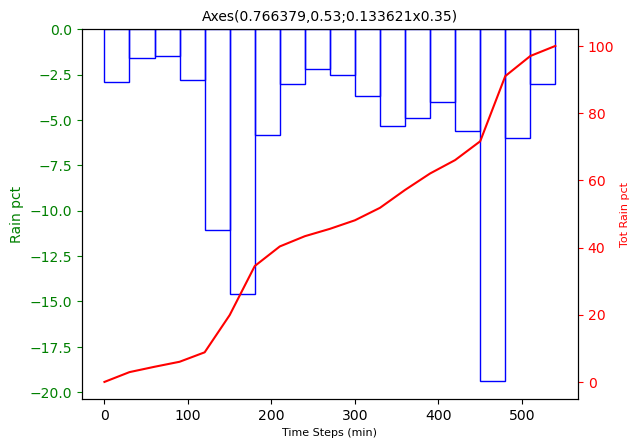

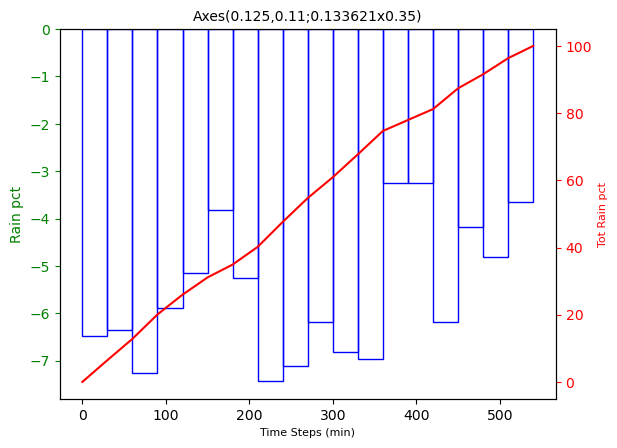

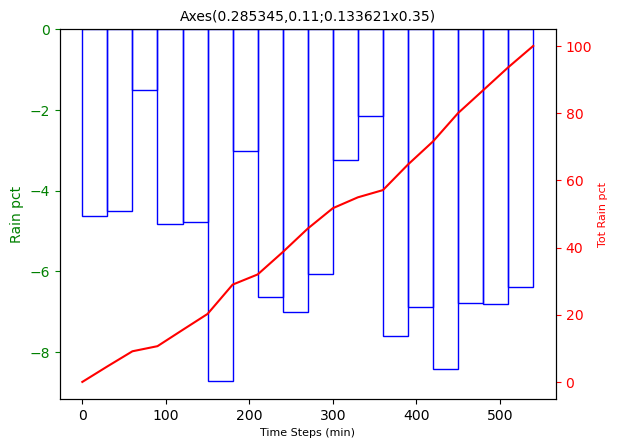

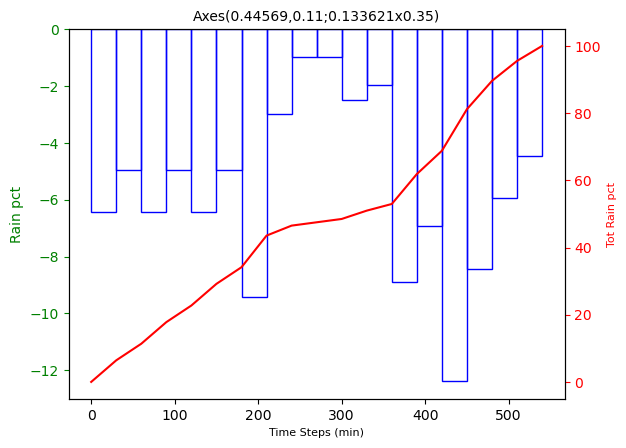

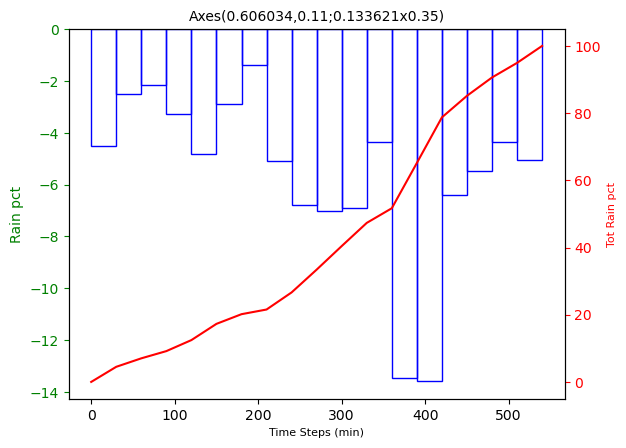

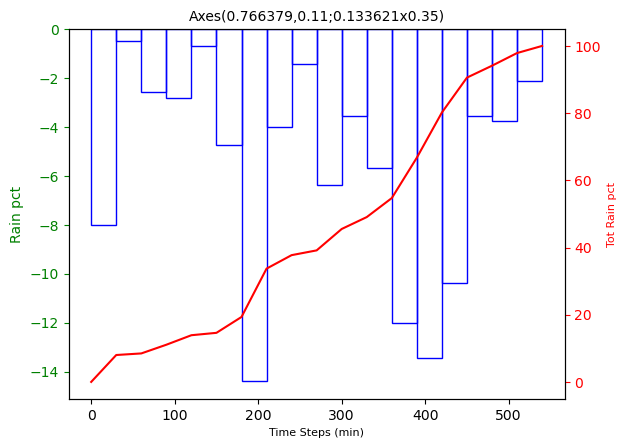

<Figure size 640x480 with 0 Axes>

Rare


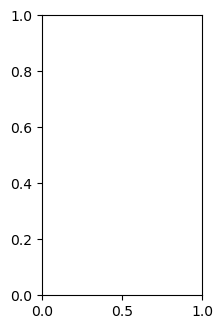

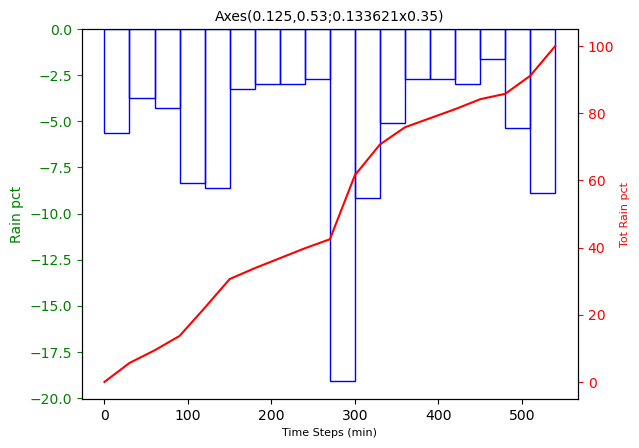

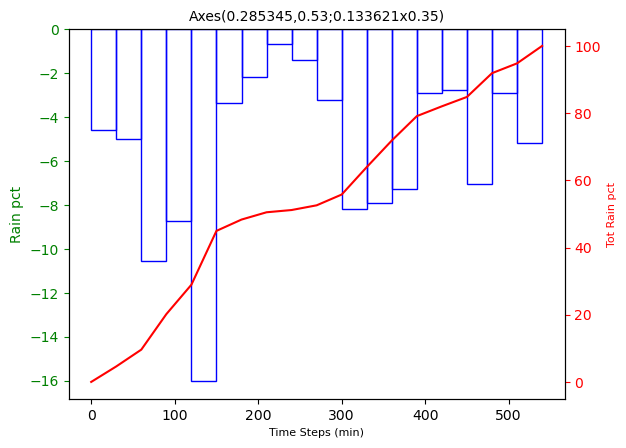

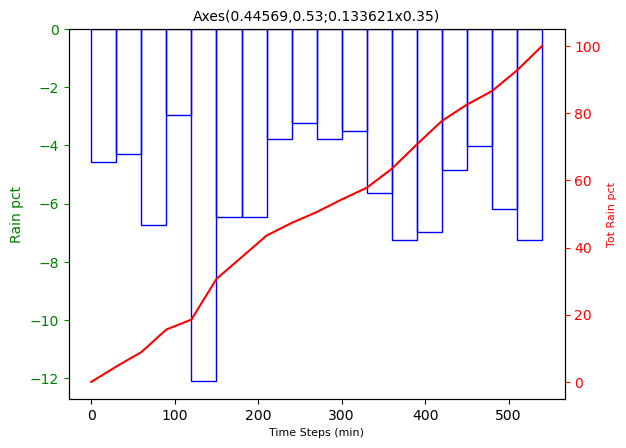

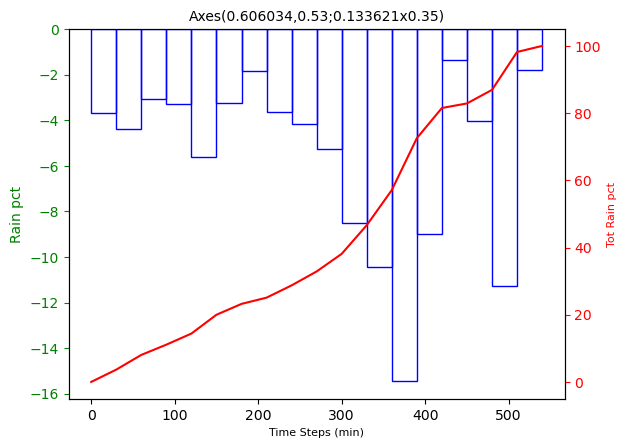

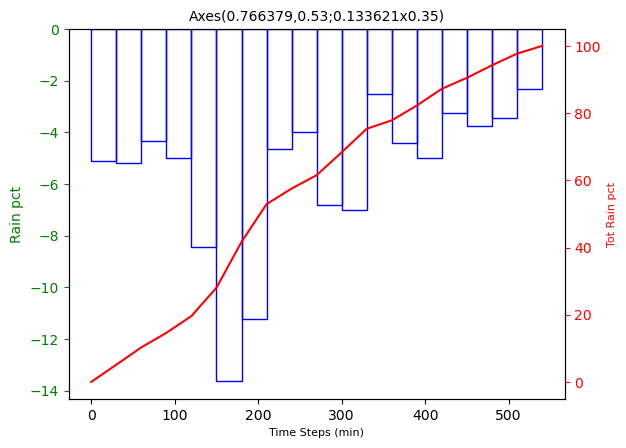

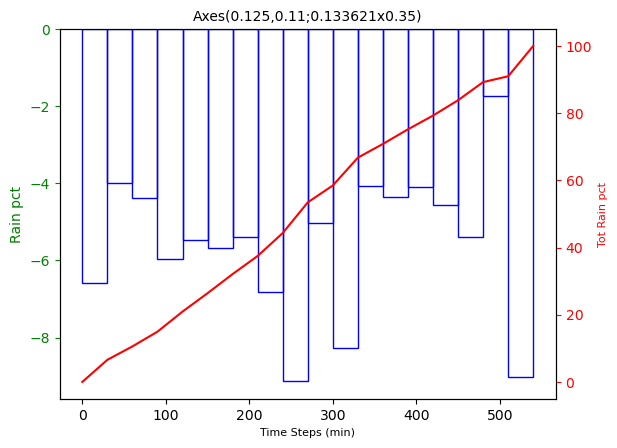

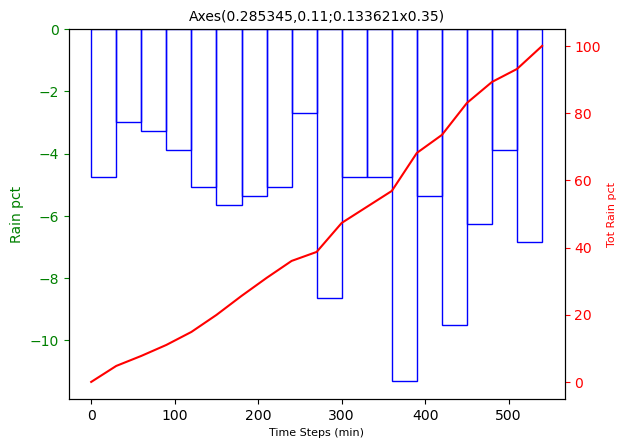

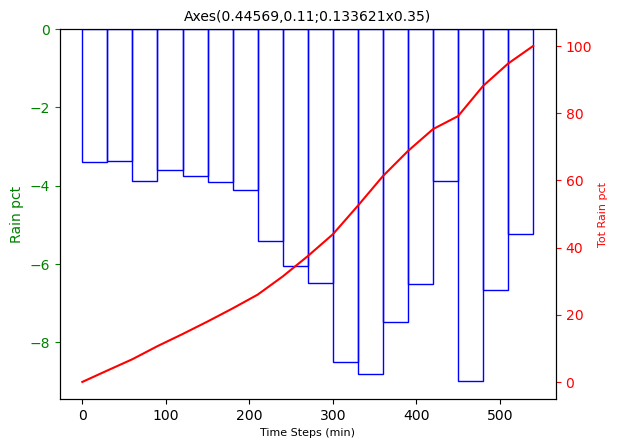

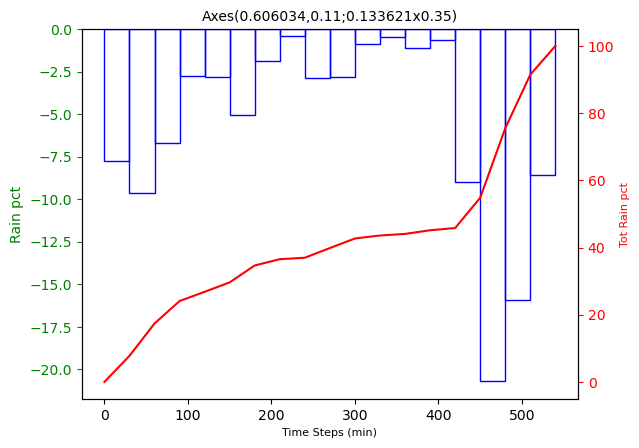

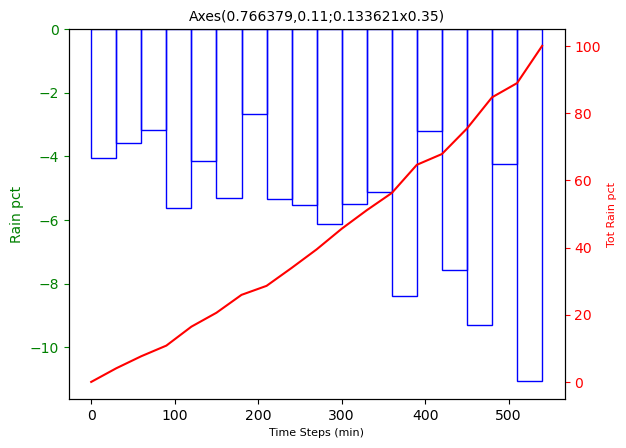

<Figure size 640x480 with 0 Axes>

In [9]:
Durations = [10,15,20,25,30,45,60,90,120,180,270,360,540,720,1080,1440,1800,2160,2880,4320,5760,7200,8640,10080] #24 durations
plot_dur_list = [120,1440,7200]
plot_dur_list = [540]
for i, dur in enumerate(Durations):
    #print(i,dur,(i*30+1),i*30+31)
    Dur_Astat = prp.linesAStat[i*30+1:i*30+31]   # [i+endcount:30*(i+1)+1+i]
    Dur_Incs = prp.linesInc[i*30+1:i*30+31]
    #Dur_Astat = decode(Dur_Astat)
    #Dur_Incs  = decode(Dur_Incs)
    #print(Dur_Astat,len(Dur_Astat))
    #print(len(Dur_Astat))
    #print(dur,plot_dur_list)
    #print(Dur_Astat.count('rare'))
    if dur in plot_dur_list:
        plot_all_patterns_for_duration(PatternType,prp.STATS_Labels,prp.INCS_Labels,Dur_Astat,Dur_Incs,debug)
    